In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 

## Máxima transferencia $ Q $ constante.

Se  desea encontrar el valor de RL que maximice la tranferencia de energia desde el generado a la carga, teniendo en cuenta que se emplea un circuito sintonizado LC con perdidas (rp).

Dado que el circuito sintonizado esta compuesto por dos componentes, para cada valor de RL podriamos proponer que el inductor L se escoja para tener un $Qc$ dado y, luego, se buscará el valor de C que sintonice a $wo$. 



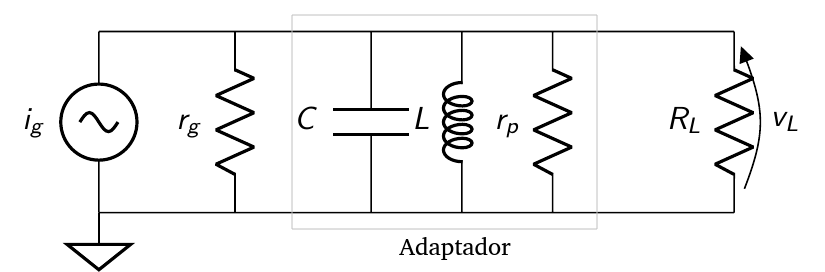

In [2]:
Image(filename= "fig/maxPot.png",width=450) 

Se busca el valor de $R_L$ para lograr la máxima transferencia de energia desde la fuente para un dado un $ Q_c $.


$$ P_{R_L} = \frac{v_L^2}{ R_L} $$

$$ P_{R_L} = \frac{(i_g \cdot \frac{1}{\frac{1}{r_g} + \frac{1}{r_p} + \frac{1}{R_L} })^2}{ R_L} $$

$$ P_{R_L} = \frac{i_g^2}{  R_L \cdot (\frac{1}{r_g} + \frac{1}{r_p} + \frac{1}{R_L})^2 } $$




$r_p$ se puede escribir en función de $Q_c$ como:

$$ \frac{1}{Q_c} =  \frac{1}{Q_o} + \frac{w_o \cdot L}{R }   $$

$$ w_o \cdot L = R \cdot (\frac{1}{Q_c} -  \frac{1}{Q_o} )   $$

donde $  R = \frac{R_L \cdot r_g }{ R_L + r_g  } $.

$$ Q_o = \frac{r_p}{ w_o \cdot L} $$ 

$$ r_p   = w_o \cdot L \cdot Q_o $$ 

$$ r_p   = R \cdot (\frac{1}{Q_c} -  \frac{1}{Q_o} ) \cdot Q_o $$

$$ r_p   =  \frac{R_L \cdot r_g }{ R_L + r_g  } \cdot (\frac{Q_o}{Q_c} -  1 )  $$


Remplazando $rp $ en la ecuación de la potencia: 

$$ P_{R_L} = \frac{i_g^2}{  R_L \cdot (\frac{1}{r_g} + \frac{1}{\frac{R_L \cdot r_g }{ R_L + r_g  } \cdot (\frac{Q_o}{Q_c} -  1 ) } + \frac{1}{R_L})^2 } $$


$$ P_{R_L} = \frac{i_g^2}{  R_L \cdot (\frac{1}{r_g} + \frac{R_L + r_g  }{R_L \cdot r_g \cdot (\frac{Q_o}{Q_c} -  1 ) } + \frac{1}{R_L})^2 } $$

$$ P_{R_L} = \frac{i_g^2 \cdot R_L^2 \cdot r_g^2 }{  R_L \cdot (r_g + \frac{R_L + r_g  }{ (\frac{Q_o}{Q_c} -  1 ) } + R_L)^2 } $$

$$ P_{R_L} = \frac{i_g^2 \cdot R_L \cdot r_g^2 }{  (r_g + \frac{R_L + r_g  }{ (\frac{Q_o}{Q_c} -  1 ) } + R_L)^2 } $$
 
$$ P_{R_L} = \frac{i_g^2 \cdot R_L \cdot r_g^2 }{ (R_L + r_g)^2 \cdot (1 + \frac{ 1 }{ (\frac{Q_o}{Q_c} -  1 ) } )^2 } $$ 



$$ P_{R_L} = \frac{i_g^2 \cdot R_L \cdot r_g^2 }{ (R_L + r_g)^2 \cdot ( \frac{ \frac{Q_o}{Q_c} }{ (\frac{Q_o}{Q_c} -  1 ) } )^2 } $$ 

$$ P_{R_L} = \frac{i_g^2 \cdot R_L \cdot r_g^2 }{ (R_L + r_g)^2 \cdot ( \frac{ Q_o }{ Q_o -  Q_c  } )^2 } $$ 

$$ P_{R_L} = \frac{i_g^2 \cdot R_L }{ (\frac{R_L + r_g}{r_g}  \cdot  \frac{ Q_o }{ Q_o -  Q_c  } )^2 } $$ 


$$ P_{R_L} =  \frac{i_g^2}{(\frac{ Q_o }{ Q_o -  Q_c  })^2}   \cdot \frac{ R_L \cdot  r_g^2}{ (R_L + r_g)^2 } $$ 



Buscando el maximo valor de $ P_{R_L} $:

$$ \frac{\partial P_{R_L}}{\partial R_L } = \frac{i_g^2}{(\frac{ Q_o }{ Q_o -  Q_c  })^2}   \cdot \frac{[(r_g^2 \cdot (R_L^2 + r_g)^2) - 2 \cdot (R_L +  r_g) \cdot (R_L \cdot  r_g^2)  ]}{(R_L +  r_g)^4} = 0$$


$$ (r_g^2 \cdot (R_L + r_g)^2) - 2 \cdot (R_L +  r_g) \cdot (R_L \cdot  r_g^2)   = 0 $$

$$ r_g^2 \cdot (R_L + r_g)^2 = 2 \cdot (R_L +  r_g) \cdot (R_L \cdot  r_g^2)  $$



$$  (R_L + r_g)  = 2 \cdot R_L   $$

$$ R_L = r_g $$

Entonces :

$$ P_{R_L} =  \frac{i_g^2}{(\frac{ Q_o }{ Q_o -  Q_c  })^2}   \cdot \frac{ r_g \cdot  r_g^2}{ (r_g + r_g)^2 } $$ 

$$ P_{R_L} =  \frac{i_g^2}{(\frac{ Q_o }{ Q_o -  Q_c  })^2}   \cdot \frac{ r_g }{ 4 } $$ 

$$ P_{R_L MAX: (RL =  rg) } =  \frac{i_g^2 \cdot r_g}{4}   \cdot (1 - \frac{ Q_c }{ Q_o })^2 $$ 

Suponer que $R_g = 10 \Omega$, $f_o = 1 MHz$, $Q_0 = 30$  y $Q_c = 10$.


In [3]:
rg = 10
fo = 1e6
Qo = 100
Qc = 10



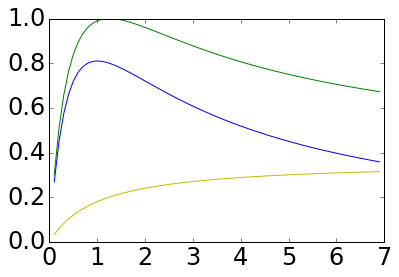

In [4]:
def PRL(ig, RL, rg, rp, Qc):
    return ig**2 * (RL * rg**2)/(RL + rg)**2 * (1 - Qc/Qo)**2


def PRG(ig, RL, rg, rp):
    return ig**2 / rg / (1/RL +1/rg + 1/rp )**2

def PRP(ig, RL, rg, rp):
    p =  ig**2 / rp / (1/RL +1/rg + 1/rp )**2
    return p 

rl = np.arange(1,70,1)

prl  = list()
prp  = list()
prg  = list()
pt   = list()
for r in rl:
    prl.append( PRL(1, r, rg, Qo, Qc) )
    
    
    wL = (1/Qc - 1/Qo) * (r * rg)/(r + rg)
    prp.append(PRP(1, r, rg, (Qo * wL) ) )
    
    prg.append(PRG(1, r, rg, (Qo * wL) ) )
    pt.append(prl[-1] + prp[-1])
    
plt.plot(rl/rg, prl / max(pt), 'b')    
plt.plot(rl/rg, prp / max(pt), 'y')    
plt.plot(rl/rg, pt / max(pt), 'g')
    
